In [1]:
!nvidia-smi

Fri Mar 27 06:39:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [3]:
!pip install h2o

     |████████████████████████████████| 126.2MB 98kB/s 
  Created wheel for h2o: filename=h2o-3.28.1.2-py2.py3-none-any.whl size=126306247 sha256=f6a58aaf434ff071024e36624e60325ef129631913257ddd27bd0bbf1672f65b
  Stored in directory: /root/.cache/pip/wheels/18/3c/ca/07a89a0183a77f66ad2fac339e16ba5f943dde887e9a1cac18
Successfully built h2o


In [0]:
import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprupgdxnx
  JVM stdout: /tmp/tmprupgdxnx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprupgdxnx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_unknownUser_b5zw1t
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [0]:
churn_train,churn_test,churn_valid=churn_df.split_frame(ratios=[.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.7,7382.25,No
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.2,528.35,Yes


In [0]:
y='Churn'
x=churn_df.columns
x.remove(y)
x.remove("customerID")

In [0]:
aml=H2OAutoML(max_models=10,seed=10, exclude_algos=["StackedEnsemble","DeepLearning"],verbosity="info",nfolds=0)

In [14]:
!nvidia-smi

Fri Mar 27 06:47:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [15]:
aml.train(x=x,y=y, training_frame=churn_train,validation_frame=churn_valid)

AutoML progress: |
06:48:26.241: Project: AutoML_20200327_64826234
06:48:26.242: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:48:26.243: Setting stopping tolerance adaptively based on the training frame: 0.014294468681971968
06:48:26.243: Build control seed: 10
06:48:26.245: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
06:48:26.374: training frame: Frame key: automl_training_py_2_sid_9d08    cols: 21    rows: 4419  chunks: 8    size: 293429  checksum: -7171531577422209742
06:48:26.374: validation frame: Frame key: py_4_sid_9d08    cols: 21    rows: 1064  chunks: 8    size: 139269  checksum: 4256254651042031216
06:48:26.382: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_9d08    cols: 21    rows: 475  chunks: 8    size: 124336  checksum: -7758330570845747583
06:48:26.383: blending frame: NULL
06:48:26.383: response column: Churn
0

In [16]:
!nvidia-smi

Fri Mar 27 06:49:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    37W / 250W |    331MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
lb=aml.leaderboard

In [19]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_3_AutoML_20200327_064826,0.826438,0.454727,0.590147,0.238889,0.389028,0.151343
GBM_2_AutoML_20200327_064826,0.824466,0.461843,0.606779,0.245697,0.391921,0.153602
XGBoost_2_AutoML_20200327_064826,0.824227,0.459549,0.597382,0.244118,0.390735,0.152674
GBM_5_AutoML_20200327_064826,0.823617,0.458982,0.593007,0.23976,0.39015,0.152217
GBM_1_AutoML_20200327_064826,0.820904,0.463961,0.589494,0.244063,0.394305,0.155476
XGBoost_1_AutoML_20200327_064826,0.82,0.465765,0.602296,0.244662,0.392968,0.154424
DRF_1_AutoML_20200327_064826,0.817244,0.468481,0.595304,0.254248,0.393818,0.155093
GBM_4_AutoML_20200327_064826,0.816841,0.477544,0.604672,0.262963,0.398222,0.15858
GBM_3_AutoML_20200327_064826,0.815621,0.475654,0.593214,0.258388,0.398945,0.159157
GLM_1_AutoML_20200327_064826,0.811416,0.468977,0.591573,0.242048,0.392757,0.154258


In [20]:
churn_pred=aml.leader.predict(churn_test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [21]:
churn_pred.head()

predict,No,Yes
Yes,0.199448,0.800552
Yes,0.697447,0.302553
Yes,0.528025,0.471975
No,0.755921,0.244079
No,0.801383,0.198617
No,0.97123,0.0287699
Yes,0.459309,0.540691
Yes,0.545633,0.454367
Yes,0.440934,0.559066
Yes,0.337601,0.662399


In [22]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13452475371125525
RMSE: 0.3667761629539947
LogLoss: 0.412251297616043
Mean Per-Class Error: 0.22669341565540702
AUC: 0.8539799425223642
AUCPR: 0.6902824931971954
Gini: 0.7079598850447284

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26815004646778107: 


,,No,Yes,Error,Rate
0,No,612.0,175.0,0.2224,(175.0/787.0)
1,Yes,69.0,229.0,0.2315,(69.0/298.0)
2,Total,681.0,404.0,0.2249,(244.0/1085.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.268150,0.652422,218.0
1,max f2,0.150617,0.765306,283.0
2,max f0point5,0.514412,0.650995,120.0
3,max accuracy,0.514412,0.804608,120.0
4,max precision,0.907971,1.000000,0.0
5,max recall,0.020178,1.000000,391.0
6,max specificity,0.907971,1.000000,0.0
7,max absolute_mcc,0.368736,0.511289,174.0
8,max min_per_class_accuracy,0.265088,0.771812,220.0
9,max mean_per_class_accuracy,0.233322,0.773307,235.0



Gains/Lift Table: Avg response rate: 27.47 %, avg score: 25.79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010138,0.876864,3.640940,3.640940,1.000000,0.888188,1.000000,0.888188,0.036913,0.036913,264.093960,264.093960
1,,2,0.021198,0.843858,3.034116,3.324336,0.833333,0.854208,0.913043,0.870459,0.033557,0.070470,203.411633,232.433615
2,,3,0.030415,0.824566,3.640940,3.420277,1.000000,0.832796,0.939394,0.859046,0.033557,0.104027,264.093960,242.027659
3,,4,0.040553,0.805579,2.978951,3.309945,0.818182,0.818209,0.909091,0.848837,0.030201,0.134228,197.895058,230.994509
4,,5,0.050691,0.780760,2.978951,3.243746,0.818182,0.794854,0.890909,0.838040,0.030201,0.164430,197.895058,224.374619
5,,6,0.100461,0.652098,2.831842,3.039684,0.777778,0.718544,0.834862,0.778840,0.140940,0.305369,183.184191,203.968352
6,,7,0.150230,0.562230,2.022744,2.702783,0.555556,0.608990,0.742331,0.722571,0.100671,0.406040,102.274422,170.278338
7,,8,0.200000,0.482306,1.887895,2.500000,0.518519,0.525745,0.686636,0.673591,0.093960,0.500000,88.789461,150.000000
8,,9,0.300461,0.347834,1.703559,2.233705,0.467890,0.415944,0.613497,0.587445,0.171141,0.671141,70.355889,123.370527
9,,10,0.400000,0.242135,1.213647,1.979866,0.333333,0.291665,0.543779,0.513841,0.120805,0.791946,21.364653,97.986577


In [0]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [24]:
model_ids

['XGBoost_3_AutoML_20200327_064826',
 'GBM_2_AutoML_20200327_064826',
 'XGBoost_2_AutoML_20200327_064826',
 'GBM_5_AutoML_20200327_064826',
 'GBM_1_AutoML_20200327_064826',
 'XGBoost_1_AutoML_20200327_064826',
 'DRF_1_AutoML_20200327_064826',
 'GBM_4_AutoML_20200327_064826',
 'GBM_3_AutoML_20200327_064826',
 'GLM_1_AutoML_20200327_064826']

In [25]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200327_064826


Model Summary: 


,,number_of_trees
0,,90.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11280261861916994
RMSE: 0.33586101086486647
LogLoss: 0.35608443550891344
Mean Per-Class Error: 0.1813151089806292
AUC: 0.8967352553444558
AUCPR: 0.7606218495165948
Gini: 0.7934705106889115

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36387711337634493: 


,,No,Yes,Error,Rate
0,No,2765.0,491.0,0.1508,(491.0/3256.0)
1,Yes,254.0,909.0,0.2184,(254.0/1163.0)
2,Total,3019.0,1400.0,0.1686,(745.0/4419.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363877,0.709325,200.0
1,max f2,0.186723,0.794585,283.0
2,max f0point5,0.608925,0.704385,99.0
3,max accuracy,0.451006,0.839104,162.0
4,max precision,0.918048,1.000000,0.0
5,max recall,0.024773,1.000000,386.0
6,max specificity,0.918048,1.000000,0.0
7,max absolute_mcc,0.363877,0.597075,200.0
8,max min_per_class_accuracy,0.324977,0.815133,218.0
9,max mean_per_class_accuracy,0.334974,0.818685,213.0



Gains/Lift Table: Avg response rate: 26.32 %, avg score: 26.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010183,0.873456,3.630782,3.630782,0.955556,0.888707,0.955556,0.888707,0.036973,0.036973,263.078246,263.078246
1,,2,0.020140,0.841650,3.713300,3.671578,0.977273,0.855435,0.966292,0.872258,0.036973,0.073947,271.330024,267.157777
2,,3,0.030324,0.824673,3.546346,3.629522,0.933333,0.833283,0.955224,0.859169,0.036113,0.110060,254.634566,262.952221
3,,4,0.040054,0.805782,3.269471,3.542052,0.860465,0.815463,0.932203,0.848552,0.031814,0.141874,226.947150,254.205226
4,,5,0.050011,0.779600,3.281521,3.490182,0.863636,0.792646,0.918552,0.837421,0.032674,0.174549,228.152114,249.018181
5,,6,0.100023,0.660728,3.111936,3.301059,0.819005,0.719655,0.868778,0.778538,0.155632,0.330181,211.193551,230.105866
6,,7,0.150034,0.582318,2.578952,3.060356,0.678733,0.622399,0.805430,0.726492,0.128977,0.459157,157.895208,206.035647
7,,8,0.200045,0.502622,2.114741,2.823953,0.556561,0.539237,0.743213,0.679678,0.105761,0.564918,111.474070,182.395253
8,,9,0.300068,0.381682,1.908425,2.518777,0.502262,0.441154,0.662896,0.600170,0.190886,0.755804,90.842454,151.877653
9,,10,0.400091,0.265987,1.031581,2.146978,0.271493,0.323018,0.565045,0.530882,0.103181,0.858985,3.158083,114.697761




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13279380786118303
RMSE: 0.3644088471225459
LogLoss: 0.40930115819822793
Mean Per-Class Error: 0.23392978702713219
AUC: 0.8450655960137629
AUCPR: 0.6536498259608
Gini: 0.6901311920275257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29388774434725445: 


,,No,Yes,Error,Rate
0,No,608.0,183.0,0.2314,(183.0/791.0)
1,Yes,65.0,208.0,0.2381,(65.0/273.0)
2,Total,673.0,391.0,0.2331,(248.0/1064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293888,0.626506,212.0
1,max f2,0.143740,0.746538,287.0
2,max f0point5,0.474636,0.628692,130.0
3,max accuracy,0.474636,0.809211,130.0
4,max precision,0.900634,1.000000,0.0
5,max recall,0.020154,1.000000,390.0
6,max specificity,0.900634,1.000000,0.0
7,max absolute_mcc,0.396820,0.487913,165.0
8,max min_per_class_accuracy,0.286395,0.764855,214.0
9,max mean_per_class_accuracy,0.235199,0.766070,240.0



Gains/Lift Table: Avg response rate: 25.66 %, avg score: 25.86 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010338,0.858010,3.543124,3.543124,0.909091,0.880549,0.909091,0.880549,0.036630,0.036630,254.312354,254.312354
1,,2,0.020677,0.839555,3.897436,3.720280,1.000000,0.846345,0.954545,0.863447,0.040293,0.076923,289.743590,272.027972
2,,3,0.030075,0.819412,3.117949,3.532051,0.800000,0.828428,0.906250,0.852504,0.029304,0.106227,211.794872,253.205128
3,,4,0.040414,0.798296,2.834499,3.353608,0.727273,0.812590,0.860465,0.842293,0.029304,0.135531,183.449883,235.360763
4,,5,0.050752,0.753892,3.188811,3.320038,0.818182,0.771149,0.851852,0.827801,0.032967,0.168498,218.881119,232.003799
5,,6,0.100564,0.630480,2.573778,2.950395,0.660377,0.691815,0.757009,0.760443,0.128205,0.296703,157.377842,195.039540
6,,7,0.150376,0.555213,2.426705,2.776923,0.622642,0.591910,0.712500,0.704617,0.120879,0.417582,142.670537,177.692308
7,,8,0.200188,0.486725,1.838413,2.543397,0.471698,0.515142,0.652582,0.657470,0.091575,0.509158,83.841316,154.339713
8,,9,0.299812,0.369027,1.544267,2.211398,0.396226,0.425246,0.567398,0.580305,0.153846,0.663004,54.426705,121.139780
9,,10,0.400376,0.259517,1.238438,1.967016,0.317757,0.314229,0.504695,0.513474,0.124542,0.787546,23.843757,96.701577




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-27 06:48:40,0.002 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.736818,0.500000,0.693147,0.500000,0.000000,1.000000,0.743421
1,,2020-03-27 06:48:40,0.146 sec,5.0,0.451361,0.599571,0.865609,0.679118,3.469251,0.219733,0.453527,0.603540,0.837466,0.612864,2.751131,0.249060
2,,2020-03-27 06:48:40,0.244 sec,10.0,0.417791,0.537026,0.868321,0.690287,3.365410,0.214528,0.421740,0.543913,0.842350,0.644820,3.897436,0.242481
3,,2020-03-27 06:48:40,0.385 sec,15.0,0.394964,0.493456,0.870190,0.702901,3.637969,0.199140,0.401219,0.504067,0.842998,0.650327,3.543124,0.234023
4,,2020-03-27 06:48:40,0.487 sec,20.0,0.379746,0.462643,0.872306,0.704202,3.630782,0.200724,0.387675,0.475996,0.844540,0.653793,3.543124,0.233083
5,,2020-03-27 06:48:40,0.621 sec,25.0,0.369361,0.440013,0.874279,0.715303,3.641337,0.195519,0.379177,0.456602,0.844806,0.652042,3.543124,0.198308
6,,2020-03-27 06:48:40,0.758 sec,30.0,0.362057,0.422863,0.876256,0.720395,3.634454,0.193256,0.373721,0.442640,0.845198,0.654339,3.543124,0.203008
7,,2020-03-27 06:48:40,0.868 sec,35.0,0.356835,0.409910,0.878387,0.723558,3.630782,0.189636,0.369988,0.432384,0.845992,0.658209,3.897436,0.215226
8,,2020-03-27 06:48:41,1.003 sec,40.0,0.352997,0.399704,0.880246,0.726627,3.630782,0.194388,0.367973,0.425395,0.846202,0.657540,3.897436,0.216165
9,,2020-03-27 06:48:41,1.160 sec,45.0,0.350174,0.391846,0.881907,0.729552,3.630782,0.189409,0.366809,0.420790,0.844985,0.655047,3.897436,0.213346



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,4058.122803,1.000000,0.243175
1,tenure,2468.510254,0.608289,0.147921
2,TotalCharges,1676.831909,0.413204,0.100481
3,MonthlyCharges,1666.080933,0.410555,0.099837
4,TechSupport.No,1134.063721,0.279455,0.067957
5,OnlineSecurity.No,1122.838989,0.276689,0.067284
6,InternetService.Fiberoptic,902.746643,0.222454,0.054095
7,PaymentMethod.Electroniccheck,654.949585,0.161392,0.039247
8,Contract.Twoyear,458.270538,0.112927,0.027461
9,InternetService.DSL,390.057098,0.096118,0.023373



See the whole table with table.as_data_frame()


In [0]:
out=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [28]:
out.params

{'backend': {'actual': 'auto', 'default': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False},
 'calibrate_model': {'actual': False, 'default': False},
 'calibration_frame': {'actual': None, 'default': None},
 'categorical_encoding': {'actual': 'AUTO', 'default': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0},
 'distribution': {'actual': 'bernoulli', 'default': 'AUTO'},
 'dmatrix_type': {'actual': 'auto', 'default': 'auto'},
 'eta': {'actual': 0.05, 'default': 0.3},
 'export_checkpoints_dir': {'actual': None, 'default': None},
 'fold_assignment': {'actual': 'AUTO', 'default': 'AUTO'},
 'fold_column': {'actual': None, 'default': None},
 'gamma': {'actual': 0.0, 'default': 0.0},
 'gpu_i

In [30]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.05,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [31]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20200327_064826


Model Summary: 


,,number_of_trees
0,,90.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11280261861916994
RMSE: 0.33586101086486647
LogLoss: 0.35608443550891344
Mean Per-Class Error: 0.1813151089806292
AUC: 0.8967352553444558
AUCPR: 0.7606218495165948
Gini: 0.7934705106889115

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36387711337634493: 


,,No,Yes,Error,Rate
0,No,2765.0,491.0,0.1508,(491.0/3256.0)
1,Yes,254.0,909.0,0.2184,(254.0/1163.0)
2,Total,3019.0,1400.0,0.1686,(745.0/4419.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.363877,0.709325,200.0
1,max f2,0.186723,0.794585,283.0
2,max f0point5,0.608925,0.704385,99.0
3,max accuracy,0.451006,0.839104,162.0
4,max precision,0.918048,1.000000,0.0
5,max recall,0.024773,1.000000,386.0
6,max specificity,0.918048,1.000000,0.0
7,max absolute_mcc,0.363877,0.597075,200.0
8,max min_per_class_accuracy,0.324977,0.815133,218.0
9,max mean_per_class_accuracy,0.334974,0.818685,213.0



Gains/Lift Table: Avg response rate: 26.32 %, avg score: 26.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010183,0.873456,3.630782,3.630782,0.955556,0.888707,0.955556,0.888707,0.036973,0.036973,263.078246,263.078246
1,,2,0.020140,0.841650,3.713300,3.671578,0.977273,0.855435,0.966292,0.872258,0.036973,0.073947,271.330024,267.157777
2,,3,0.030324,0.824673,3.546346,3.629522,0.933333,0.833283,0.955224,0.859169,0.036113,0.110060,254.634566,262.952221
3,,4,0.040054,0.805782,3.269471,3.542052,0.860465,0.815463,0.932203,0.848552,0.031814,0.141874,226.947150,254.205226
4,,5,0.050011,0.779600,3.281521,3.490182,0.863636,0.792646,0.918552,0.837421,0.032674,0.174549,228.152114,249.018181
5,,6,0.100023,0.660728,3.111936,3.301059,0.819005,0.719655,0.868778,0.778538,0.155632,0.330181,211.193551,230.105866
6,,7,0.150034,0.582318,2.578952,3.060356,0.678733,0.622399,0.805430,0.726492,0.128977,0.459157,157.895208,206.035647
7,,8,0.200045,0.502622,2.114741,2.823953,0.556561,0.539237,0.743213,0.679678,0.105761,0.564918,111.474070,182.395253
8,,9,0.300068,0.381682,1.908425,2.518777,0.502262,0.441154,0.662896,0.600170,0.190886,0.755804,90.842454,151.877653
9,,10,0.400091,0.265987,1.031581,2.146978,0.271493,0.323018,0.565045,0.530882,0.103181,0.858985,3.158083,114.697761




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13279380786118303
RMSE: 0.3644088471225459
LogLoss: 0.40930115819822793
Mean Per-Class Error: 0.23392978702713219
AUC: 0.8450655960137629
AUCPR: 0.6536498259608
Gini: 0.6901311920275257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29388774434725445: 


,,No,Yes,Error,Rate
0,No,608.0,183.0,0.2314,(183.0/791.0)
1,Yes,65.0,208.0,0.2381,(65.0/273.0)
2,Total,673.0,391.0,0.2331,(248.0/1064.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293888,0.626506,212.0
1,max f2,0.143740,0.746538,287.0
2,max f0point5,0.474636,0.628692,130.0
3,max accuracy,0.474636,0.809211,130.0
4,max precision,0.900634,1.000000,0.0
5,max recall,0.020154,1.000000,390.0
6,max specificity,0.900634,1.000000,0.0
7,max absolute_mcc,0.396820,0.487913,165.0
8,max min_per_class_accuracy,0.286395,0.764855,214.0
9,max mean_per_class_accuracy,0.235199,0.766070,240.0



Gains/Lift Table: Avg response rate: 25.66 %, avg score: 25.86 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010338,0.858010,3.543124,3.543124,0.909091,0.880549,0.909091,0.880549,0.036630,0.036630,254.312354,254.312354
1,,2,0.020677,0.839555,3.897436,3.720280,1.000000,0.846345,0.954545,0.863447,0.040293,0.076923,289.743590,272.027972
2,,3,0.030075,0.819412,3.117949,3.532051,0.800000,0.828428,0.906250,0.852504,0.029304,0.106227,211.794872,253.205128
3,,4,0.040414,0.798296,2.834499,3.353608,0.727273,0.812590,0.860465,0.842293,0.029304,0.135531,183.449883,235.360763
4,,5,0.050752,0.753892,3.188811,3.320038,0.818182,0.771149,0.851852,0.827801,0.032967,0.168498,218.881119,232.003799
5,,6,0.100564,0.630480,2.573778,2.950395,0.660377,0.691815,0.757009,0.760443,0.128205,0.296703,157.377842,195.039540
6,,7,0.150376,0.555213,2.426705,2.776923,0.622642,0.591910,0.712500,0.704617,0.120879,0.417582,142.670537,177.692308
7,,8,0.200188,0.486725,1.838413,2.543397,0.471698,0.515142,0.652582,0.657470,0.091575,0.509158,83.841316,154.339713
8,,9,0.299812,0.369027,1.544267,2.211398,0.396226,0.425246,0.567398,0.580305,0.153846,0.663004,54.426705,121.139780
9,,10,0.400376,0.259517,1.238438,1.967016,0.317757,0.314229,0.504695,0.513474,0.124542,0.787546,23.843757,96.701577




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-03-27 06:48:40,0.002 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.736818,0.500000,0.693147,0.500000,0.000000,1.000000,0.743421
1,,2020-03-27 06:48:40,0.146 sec,5.0,0.451361,0.599571,0.865609,0.679118,3.469251,0.219733,0.453527,0.603540,0.837466,0.612864,2.751131,0.249060
2,,2020-03-27 06:48:40,0.244 sec,10.0,0.417791,0.537026,0.868321,0.690287,3.365410,0.214528,0.421740,0.543913,0.842350,0.644820,3.897436,0.242481
3,,2020-03-27 06:48:40,0.385 sec,15.0,0.394964,0.493456,0.870190,0.702901,3.637969,0.199140,0.401219,0.504067,0.842998,0.650327,3.543124,0.234023
4,,2020-03-27 06:48:40,0.487 sec,20.0,0.379746,0.462643,0.872306,0.704202,3.630782,0.200724,0.387675,0.475996,0.844540,0.653793,3.543124,0.233083
5,,2020-03-27 06:48:40,0.621 sec,25.0,0.369361,0.440013,0.874279,0.715303,3.641337,0.195519,0.379177,0.456602,0.844806,0.652042,3.543124,0.198308
6,,2020-03-27 06:48:40,0.758 sec,30.0,0.362057,0.422863,0.876256,0.720395,3.634454,0.193256,0.373721,0.442640,0.845198,0.654339,3.543124,0.203008
7,,2020-03-27 06:48:40,0.868 sec,35.0,0.356835,0.409910,0.878387,0.723558,3.630782,0.189636,0.369988,0.432384,0.845992,0.658209,3.897436,0.215226
8,,2020-03-27 06:48:41,1.003 sec,40.0,0.352997,0.399704,0.880246,0.726627,3.630782,0.194388,0.367973,0.425395,0.846202,0.657540,3.897436,0.216165
9,,2020-03-27 06:48:41,1.160 sec,45.0,0.350174,0.391846,0.881907,0.729552,3.630782,0.189409,0.366809,0.420790,0.844985,0.655047,3.897436,0.213346



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,4058.122803,1.000000,0.243175
1,tenure,2468.510254,0.608289,0.147921
2,TotalCharges,1676.831909,0.413204,0.100481
3,MonthlyCharges,1666.080933,0.410555,0.099837
4,TechSupport.No,1134.063721,0.279455,0.067957
5,OnlineSecurity.No,1122.838989,0.276689,0.067284
6,InternetService.Fiberoptic,902.746643,0.222454,0.054095
7,PaymentMethod.Electroniccheck,654.949585,0.161392,0.039247
8,Contract.Twoyear,458.270538,0.112927,0.027461
9,InternetService.DSL,390.057098,0.096118,0.023373



See the whole table with table.as_data_frame()


In [0]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [33]:

out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36387711337634493: 


,,No,Yes,Error,Rate
0,No,2765.0,491.0,0.1508,(491.0/3256.0)
1,Yes,254.0,909.0,0.2184,(254.0/1163.0)
2,Total,3019.0,1400.0,0.1686,(745.0/4419.0)


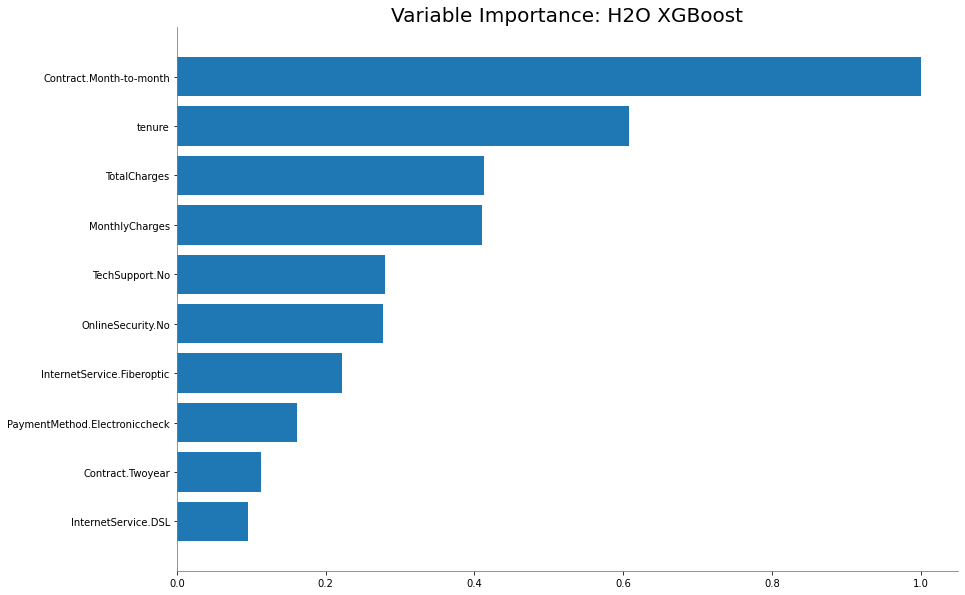

In [34]:
out.varimp_plot()

In [35]:
aml.leader.download_mojo(path="./")

'/content/XGBoost_3_AutoML_20200327_064826.zip'